In [ ]:
#LogisticRegression

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
# load data as dataframe
df = pd.read_csv('../datasets/kr-vs-k.csv')

df['White_King'] = df['White_king_col'] + '(' + df['White_king_row'].astype(str) + ')'
df['White_Rook'] = df['White_rook_col'] + '(' + df['White_rook_row'].astype(str) + ')'
df['Black_King'] = df['Black_king_col'] + '(' + df['Black_king_row'].astype(str) + ')'

df.drop(['White_king_col', 'White_king_row',
         'White_rook_col','White_rook_row'
         ,'Black_king_col','Black_king_row'], axis=1, inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder
#LabelEncoderのインスタンスを生成
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
#ラベルを覚えさせる
le1 = le1.fit(df['Game'])
le2 = le2.fit(df['White_King'])
le3 = le3.fit(df['White_Rook'])
le4 = le4.fit(df['Black_King'])

#ラベルを整数に変換
df['Game'] = le1.transform(df['Game'])
df['White_King'] = le2.transform(df['White_King'])
df['White_Rook'] = le3.transform(df['White_Rook'])
df['Black_King'] = le4.transform(df['Black_King'])

df

,Game,White_King,White_Rook,Black_King
0,0,0,10,17
1,0,0,16,17
2,0,0,16,24
3,0,0,16,25
4,0,0,17,16
5,0,0,17,18
6,0,0,17,24
7,0,0,17,25
8,0,0,17,26
9,0,0,18,17


In [5]:
X=df.loc[:,['White_King','White_Rook','Black_King']]
y=df.loc[:,'Game']

In [6]:
# scaling and split
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    shuffle=True, random_state=42)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [37]:
# learning
clf = LogisticRegression(penalty='l2', C=100.0, random_state=42)
clf.fit(X, y)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [38]:
# show probability
for i in range(5):
    print(round(y_proba[i, 0], 3), round(y_proba[i, 1], 3))

0.113 0.024
0.123 0.009
0.135 0.014
0.106 0.015
0.141 0.012


In [39]:
# evaluation
confusion_matrix(y_test, y_pred)

array([[  0,   0,   0,   0,   4,   0, 402,   0,   0,   0,   0,   0,   0,
        118,   0, 296,   0,   0],
       [  2,   0,   9,   1,  19,   0, 117,   9,   0,   0,   0,   0,   0,
         55,   0, 214,   0,   0],
       [  5,   0,  15,   5,   2,   0, 313,  34,   0,   0,   0,   3,   0,
        122,   0, 385,   0,   0],
       [  0,   0,   0,   1,   0,   0, 513,   0,   0,   0,   0,   3,   0,
         55,   0,  54,   0,   0],
       [  3,   0,   3,   0,  15,   0,  19,   2,   0,   0,   0,   0,   0,
         16,   0,  89,   0,   0],
       [  7,   0,   0,   0,   9,   0,   3,   0,   0,   0,   0,   0,   0,
          5,   0,  44,   0,   0],
       [ 28,   0,   0,   3,   0,   0, 971,   0,   0,   0,   0,   0,   0,
        164,   0, 231,   0,   0],
       [  2,   0,  36,   0,   2,   0, 165,  40,   0,   0,   0,   0,   0,
         53,   0, 224,   0,   0],
       [  0,   0,   0,   0,   0,   0,  25,   0,   0,   0,   0,   0,   0,
          0,   0,   4,   0,   0],
       [  0,   0,   5,   0,  17,   0,

In [40]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 0.19365569680408698


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# 交差検証
scores = cross_val_score(clf, X, y,cv=5)
# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))

# スコアの平均値
print('Average score: {}'.format(np.mean(scores)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

Cross-Validation scores: [0.05533808 0.15458593 0.19390483 0.20317517 0.08654532]
Average score: 0.13870986657258538


In [11]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       820
           1       0.00      0.00      0.00       426
           2       0.15      0.02      0.03       884
           3       0.07      0.00      0.00       626
           4       0.16      0.10      0.12       147
           5       0.00      0.00      0.00        68
           6       0.24      0.70      0.35      1397
           7       0.39      0.08      0.13       522
           8       0.00      0.00      0.00        29
           9       0.00      0.00      0.00       192
          10       0.00      0.00      0.00       180
          11       0.00      0.00      0.00       118
          12       0.00      0.00      0.00       577
          13       0.15      0.13      0.14      1237
          14       0.00      0.00      0.00        26
          15       0.15      0.39      0.22      1082
          16       0.00      0.00      0.00        77
          17       0.00    

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
# analyze results
print('y = {} * x + {}'.format(clf.coef_, clf.intercept_))

y = [[-3.84617188e-02  2.59246484e-01  2.71242563e-02]
 [ 7.81523428e-01 -1.39200688e-01  1.36603962e-01]
 [ 3.35818742e-01  1.33506045e-03  1.43493739e-01]
 [-1.20289997e+00  2.53647108e-02 -1.48546707e-01]
 [ 1.25611449e+00  1.00307894e-01 -9.42234974e-01]
 [ 1.39124019e+00  1.91408490e-01 -1.55078464e+00]
 [-5.55565490e-01 -6.94959296e-02 -4.05864052e-02]
 [ 5.70893759e-01 -1.72734184e-01  2.86144493e-01]
 [-2.22168162e-01  4.21374172e-02 -2.67889264e+00]
 [ 7.65288108e-01  3.54282654e-02 -1.27899578e-01]
 [ 1.05024580e+00 -3.64608376e-01  1.44998760e-02]
 [-5.67507125e+00  2.82375745e-01 -3.90856863e-01]
 [ 3.35679885e-01 -4.02026172e-02 -1.99967992e-02]
 [-1.82525257e-01 -1.08875587e-02  7.97350612e-02]
 [ 7.31153463e-01 -2.80580999e-01 -2.64475167e+00]
 [ 1.74366910e-01  2.10811786e-02  1.07274793e-01]
 [-8.78537692e-02  3.32447458e-01 -2.25504908e+00]
 [-1.94564555e-01 -1.13436889e+00 -2.34824094e+00]] * x + [ -2.22866355  -3.19285154  -2.22850538  -3.03682619  -5.18715637
  -6.

In [13]:
odds = np.exp(clf.coef_).flatten()
odds_df = pd.DataFrame([df.columns, odds], index=['features', 'odds']).T

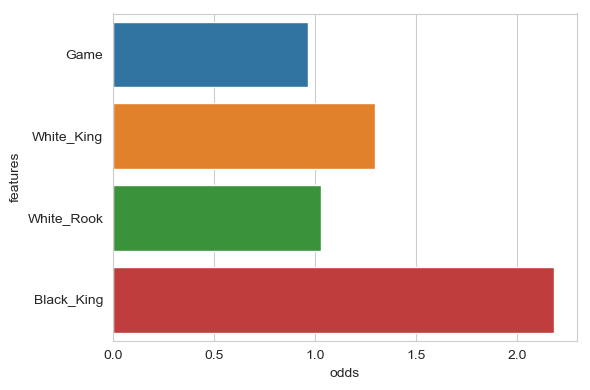

In [14]:
plt.figure(dpi=100)
sns.barplot(x=odds_df['odds'], y=odds_df['features'])
plt.tight_layout()

In [15]:
coef_df = pd.DataFrame([df.columns,
                        clf.coef_.flatten()], index=['features', 'coef']).T

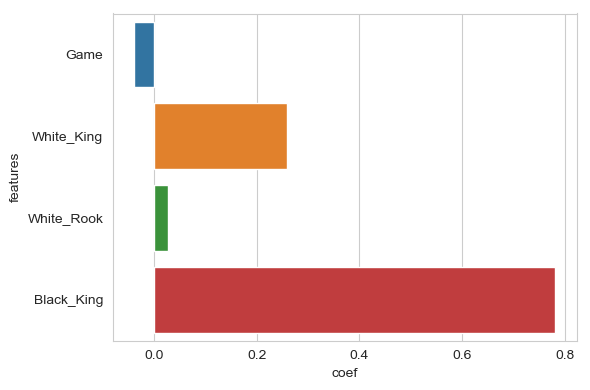

In [16]:
plt.figure(dpi=100)
sns.barplot(x=coef_df['coef'], y=coef_df['features'])
plt.tight_layout()